# 使用 sklearn库实现

In [24]:
# python: 3.5.2
# encoding: utf-8

import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt

In [2]:
def load_data(fname):
    """
    载入数据。
    """
    with open(fname, 'r') as f:
        data = []
        line = f.readline()
        for line in f:
            line = line.strip().split()
            x1 = float(line[0])
            x2 = float(line[1])
            t = int(line[2])
            data.append([x1, x2, t])
        return np.array(data)


def eval_acc(label, pred):
    """
    计算准确率。
    """
    return np.sum(label == pred) / len(pred)

## 模型类

In [58]:
class SVM():
    """
    SVM模型。
    """
    
    def __init__(self,kernel:"kernel='linear'(线性核) or 'poly'(多项式核) or 'sigmoid'(logistic核) or 'rbf'(高斯核)"='linear'):
        # 请补全此处代码
        # kernel='linear'(线性核) or 'poly'(多项式核) or 'sigmoid'(logistic核) or 'rbf'(高斯核)
        self.model = svm.SVC(kernel=kernel) 

    def train(self, data_train):
        """
        训练模型。
        """
        # 请补全此处代码
        self.model.fit(data_train[:,:2],data_train[:,-1])
        
    def predict(self, x):
        """
        预测标签。
        """
        # 请补全此处代码
        return self.model.predict(x)

## 三类数据加载

In [54]:
def my_load_data(cat:'str = kernel or linear or multi'='kernel'):
    data_train=[]
    data_test=[]
    if cat== 'kernel':
        train_file = 'data/train_kernel.txt'
        test_file = 'data/test_kernel.txt'
        data_train = load_data(train_file)  # 数据格式[x1, x2, t]
        data_test = load_data(test_file)
        print('load kernel data!')
    elif cat== 'linear':
        train_file = 'data/train_linear.txt'
        test_file = 'data/test_linear.txt'
        data_train = load_data(train_file)  # 数据格式[x1, x2, t]
        data_test = load_data(test_file)
        print('load linear data!')
    elif cat=='multi':
        train_file = 'data/train_multi.txt'
        test_file = 'data/test_multi.txt'
        data_train = load_data(train_file)  # 数据格式[x1, x2, t]
        data_test = load_data(test_file)
        print('load multi data!')
    else:
        print("file not exits!")
    return data_train,data_test

## 二分类数据绘图

In [116]:
def mydraw2(model,data_train=data_train,data_test=data_test,title="pic"):
    #   z 中文
    matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    # 定制表格
    data_all=np.vstack((data_train,data_test))
    x=data_all[:,:2]
    y=data_all[:,-1]
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
    
    cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
    cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])
    # 画图
    plt.figure(figsize=(10,8), facecolor='w')
    grid_hat = model.predict(grid_test)
    grid_hat = grid_hat.reshape(x1.shape)
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), edgecolors='k', s=40, cmap=cm_dark)      # 样本的显示
    plt.scatter(x[model.support_, 0], x[model.support_, 1], edgecolors='k', facecolors='none', s=100, marker='o')   # 支撑向量
    z = model.decision_function(grid_test)
    z = z.reshape(x1.shape)
    print(x1.shape,z.shape)
    plt.contour(x1, x2, z, colors=list('krk'), linestyles=['--', '-', '--'], linewidths=[1, 2, 1], levels=[-1, 0, 1])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(title)
    plt.grid()
    plt.show()

##  1.使用基于某种核函数（线性，多项式或高斯核函数）的SVM 解决非线性可分的二分类问题，数 据集为train_kernel.txt 及test_kernel.txt。

load kernel data!
train accuracy: 81.5%
test accuracy: 81.0%
(500, 500) (500, 500)


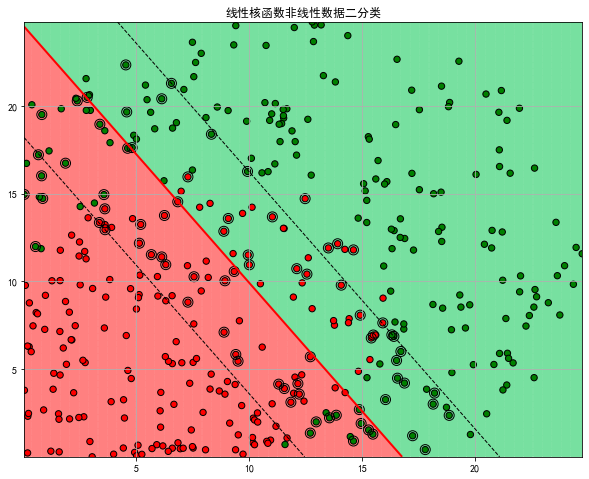

In [117]:
if __name__ == '__main__':
    # 载入数据，实际实用时将x替换为具体名称
    data_train,data_test=my_load_data('kernel')

    # 使用训练集训练SVM模型
    mysvm = SVM('linear')  # 初始化模型
    mysvm.train(data_train)  # 训练模型

    # 使用SVM模型预测标签
    x_train = data_train[:, :2]  # feature [x1, x2]
    t_train = data_train[:, 2]  # 真实标签
    t_train_pred = mysvm.predict(x_train)  # 预测标签
    x_test = data_test[:, :2]
    t_test = data_test[:, 2]
    t_test_pred = mysvm.predict(x_test)

    # 评估结果，计算准确率
    acc_train = eval_acc(t_train, t_train_pred)
    acc_test = eval_acc(t_test, t_test_pred)
    print("train accuracy: {:.1f}%".format(acc_train * 100))
    print("test accuracy: {:.1f}%".format(acc_test * 100))
    
    mydraw2(mysvm.model,data_train,data_test,title="线性核函数非线性数据二分类")

load kernel data!


c:\users\sha\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train accuracy: 97.5%
test accuracy: 95.5%
(500, 500) (500, 500)


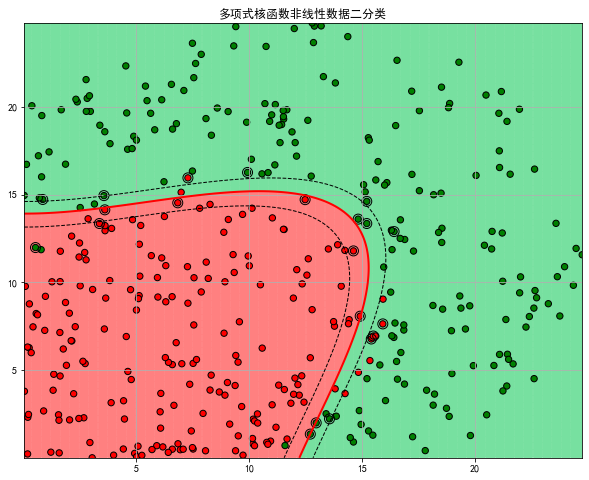

In [119]:
if __name__ == '__main__':
    # 载入数据，实际实用时将x替换为具体名称
    data_train,data_test=my_load_data('kernel')

    # 使用训练集训练SVM模型
    mysvm = SVM('poly')  # 初始化模型
    mysvm.train(data_train)  # 训练模型

    # 使用SVM模型预测标签
    x_train = data_train[:, :2]  # feature [x1, x2]
    t_train = data_train[:, 2]  # 真实标签
    t_train_pred = mysvm.predict(x_train)  # 预测标签
    x_test = data_test[:, :2]
    t_test = data_test[:, 2]
    t_test_pred = mysvm.predict(x_test)

    # 评估结果，计算准确率
    acc_train = eval_acc(t_train, t_train_pred)
    acc_test = eval_acc(t_test, t_test_pred)
    print("train accuracy: {:.1f}%".format(acc_train * 100))
    print("test accuracy: {:.1f}%".format(acc_test * 100))
    
    mydraw2(mysvm.model,data_train,data_test,title="多项式核函数非线性数据二分类")

load kernel data!
train accuracy: 100.0%
test accuracy: 95.0%


c:\users\sha\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(500, 500) (500, 500)


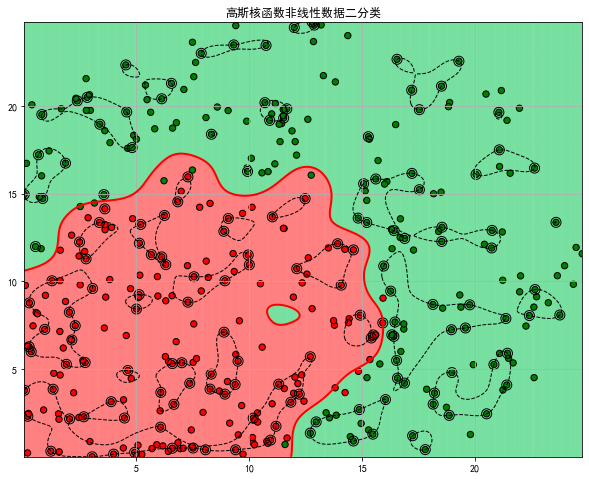

In [120]:
if __name__ == '__main__':
    # 载入数据，实际实用时将x替换为具体名称
    data_train,data_test=my_load_data('kernel')

    # 使用训练集训练SVM模型
    mysvm = SVM('rbf')  # 初始化模型
    mysvm.train(data_train)  # 训练模型

    # 使用SVM模型预测标签
    x_train = data_train[:, :2]  # feature [x1, x2]
    t_train = data_train[:, 2]  # 真实标签
    t_train_pred = mysvm.predict(x_train)  # 预测标签
    x_test = data_test[:, :2]
    t_test = data_test[:, 2]
    t_test_pred = mysvm.predict(x_test)

    # 评估结果，计算准确率
    acc_train = eval_acc(t_train, t_train_pred)
    acc_test = eval_acc(t_test, t_test_pred)
    print("train accuracy: {:.1f}%".format(acc_train * 100))
    print("test accuracy: {:.1f}%".format(acc_test * 100))
    
    mydraw2(mysvm.model,data_train,data_test,title="高斯核函数非线性数据二分类")

# 分别使用线性分类器（squared error）、logistic 回归（cross entropy error）以及SVM（hinge error) 解 决线性二分类问题，并比较三种模型的效果。
数据集为train_linear.txt 及test_linear.txt。 

In [115]:
def mydraw2(model,data_train=data_train,data_test=data_test,title="pic"):
    #   z 中文
    matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    # 定制表格
    data_all=np.vstack((data_train,data_test))
    x=data_all[:,:2]
    y=data_all[:,-1]
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
    
    cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
    cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])
    # 画图
    plt.figure(figsize=(10,8), facecolor='w')
    grid_hat = model.predict(grid_test)
    grid_hat = grid_hat.reshape(x1.shape)
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), edgecolors='k', s=40, cmap=cm_dark)      # 样本的显示
#     plt.scatter(x[model.support_, 0], x[model.support_, 1], edgecolors='k', facecolors='none', s=100, marker='o')   # 支撑向量
#     z = model.decision_function(grid_test)
#     z = z.reshape(x1.shape)
#     print(x1.shape,z.shape)
#     plt.contour(x1, x2, z, colors=list('krk'), linestyles=['--', '-', '--'], linewidths=[1, 2, 1], levels=[-1, 0, 1])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(title)
    plt.grid()
    plt.show()

In [109]:
from sklearn.linear_model import LinearRegression

load linear data!
train accuracy: 96.0%
test accuracy: 98.0%


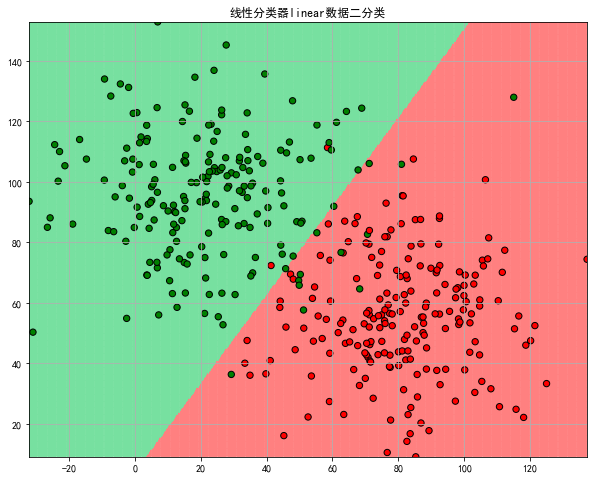

In [110]:
if __name__ == '__main__':
    # 载入数据，实际实用时将x替换为具体名称
    data_train,data_test=my_load_data('linear')

    # 使用训练集训练线性分类器模型
    lr = LinearRegression()  # 初始化模型
    lr.fit(data_train[:,:2],data_train[:,-1])  # 训练模型

    # 使用SVM模型预测标签
    x_train = data_train[:, :2]  # feature [x1, x2]
    t_train = data_train[:, 2]  # 真实标签
    t_train_pred = lr.predict(x_train)  # 预测标签
    t_train_pred[np.where(t_train_pred>0)]=1
    t_train_pred[np.where(t_train_pred<0)]=-1
    
    x_test = data_test[:, :2]
    t_test = data_test[:, 2]
    t_test_pred = lr.predict(x_test)
    t_test_pred[np.where(t_test_pred>0)]=1
    t_test_pred[np.where(t_test_pred<0)]=-1    

    # 评估结果，计算准确率
    acc_train = eval_acc(t_train, t_train_pred)
    acc_test = eval_acc(t_test, t_test_pred)
    print("train accuracy: {:.1f}%".format(acc_train * 100))
    print("test accuracy: {:.1f}%".format(acc_test * 100))
    
    mydraw2(lr,data_train,data_test,title="线性分类器linear数据二分类")

In [111]:
from sklearn.linear_model import LogisticRegression

load linear data!
train accuracy: 95.5%
test accuracy: 96.5%


c:\users\sha\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


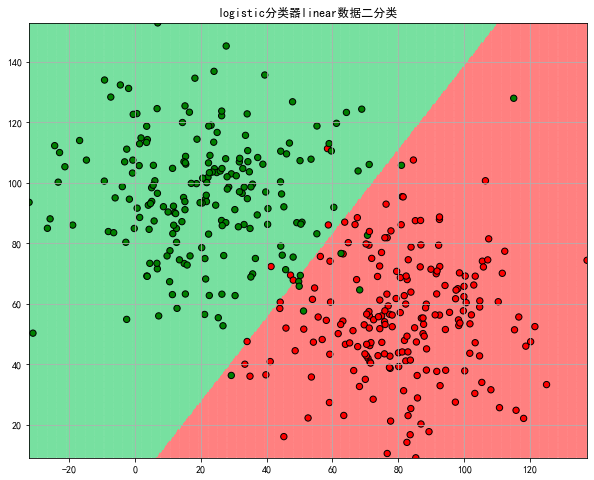

In [112]:
if __name__ == '__main__':
    # 载入数据，实际实用时将x替换为具体名称
    data_train,data_test=my_load_data('linear')

    # 使用训练集训练线性分类器模型
    lr = LogisticRegression()  # 初始化模型
    lr.fit(data_train[:,:2],data_train[:,-1])  # 训练模型

    # 使用SVM模型预测标签
    x_train = data_train[:, :2]  # feature [x1, x2]
    t_train = data_train[:, 2]  # 真实标签
    t_train_pred = lr.predict(x_train)  # 预测标签
    
    x_test = data_test[:, :2]
    t_test = data_test[:, 2]
    t_test_pred = lr.predict(x_test) 

    # 评估结果，计算准确率
    acc_train = eval_acc(t_train, t_train_pred)
    acc_test = eval_acc(t_test, t_test_pred)
    print("train accuracy: {:.1f}%".format(acc_train * 100))
    print("test accuracy: {:.1f}%".format(acc_test * 100))
    
    mydraw2(lr,data_train,data_test,title="logistic分类器linear数据二分类")

In [113]:
from sklearn import svm

load linear data!
train accuracy: 99.5%
test accuracy: 93.0%


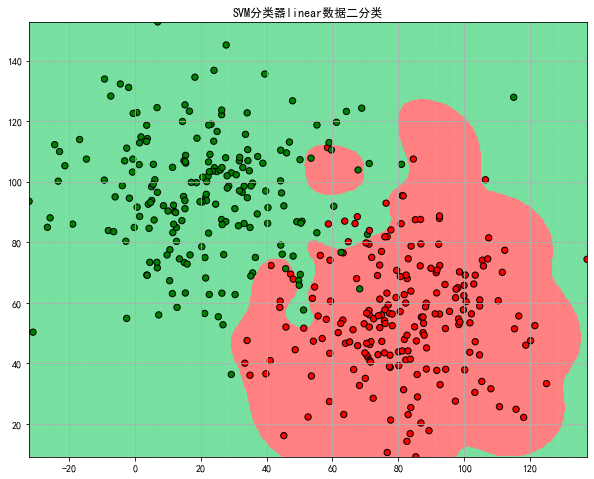

In [114]:
if __name__ == '__main__':
    # 载入数据，实际实用时将x替换为具体名称
    data_train,data_test=my_load_data('linear')

    # 使用训练集训练线性分类器模型
    mySVM = svm.SVC(kernel='rbf',gamma=0.01,C=100)  # 初始化模型
    mySVM.fit(data_train[:,:2],data_train[:,-1])  # 训练模型

    # 使用SVM模型预测标签
    x_train = data_train[:, :2]  # feature [x1, x2]
    t_train = data_train[:, 2]  # 真实标签
    t_train_pred = mySVM.predict(x_train)  # 预测标签
    
    x_test = data_test[:, :2]
    t_test = data_test[:, 2]
    t_test_pred = mySVM.predict(x_test)  

    # 评估结果，计算准确率
    acc_train = eval_acc(t_train, t_train_pred)
    acc_test = eval_acc(t_test, t_test_pred)
    print("train accuracy: {:.1f}%".format(acc_train * 100))
    print("test accuracy: {:.1f}%".format(acc_test * 100))
    
    mydraw2(mySVM,data_train,data_test,title="SVM分类器linear数据二分类")

# 使用多分类SVM 解决三分类问题。数据集为train_multi.txt 及test_multi.txt

In [121]:
def mydraw3(model,data_train=data_train,data_test=data_test,title="pic"):
    #   z 中文
    matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    # 定制表格
    data_all=np.vstack((data_train,data_test))
    x=data_all[:,:2]
    y=data_all[:,-1]
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
    
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    # 画图
    plt.figure(figsize=(10,8), facecolor='w')
    grid_hat = model.predict(grid_test)
    grid_hat = grid_hat.reshape(x1.shape)
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), edgecolors='k', s=40, cmap=cm_dark)      # 样本的显示
    plt.scatter(x[model.support_, 0], x[model.support_, 1], edgecolors='k', facecolors='none', s=100, marker='o')   # 支撑向量
#     z = model.decision_function(grid_test)
#     z = z.reshape(x1.shape)
#     print(x1.shape,z.shape)
#     plt.contour(x1, x2, z, colors=list('krk'), linestyles=['--', '-', '--'], linewidths=[1, 2, 1], levels=[-1, 0, 1])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(title)
    plt.grid()
    plt.show()

load multi data!
train accuracy: 98.3%
test accuracy: 98.0%


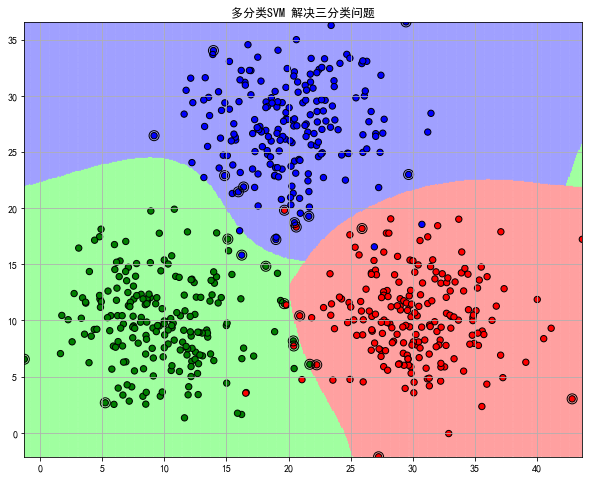

In [122]:
if __name__ == '__main__':
    # 载入数据，实际实用时将x替换为具体名称
    data_train,data_test=my_load_data('multi')

    # 使用训练集训练线性分类器模型
    mySVM = svm.SVC(kernel='rbf',gamma=0.01,C=100)  # 初始化模型
    mySVM.fit(data_train[:,:2],data_train[:,-1])  # 训练模型

    # 使用SVM模型预测标签
    x_train = data_train[:, :2]  # feature [x1, x2]
    t_train = data_train[:, 2]  # 真实标签
    t_train_pred = mySVM.predict(x_train)  # 预测标签
    
    x_test = data_test[:, :2]
    t_test = data_test[:, 2]
    t_test_pred = mySVM.predict(x_test)  

    # 评估结果，计算准确率
    acc_train = eval_acc(t_train, t_train_pred)
    acc_test = eval_acc(t_test, t_test_pred)
    print("train accuracy: {:.1f}%".format(acc_train * 100))
    print("test accuracy: {:.1f}%".format(acc_test * 100))
    
    mydraw3(mySVM,data_train,data_test,title="多分类SVM 解决三分类问题")